In [1]:
import glob
import os
#import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
spect = []
spect_id = []
for j in ['Parkinsons','NonParkinsons']:
    file = []
    for root, dirs, files in os.walk('spectrograms/'+j):
        file += glob.glob(os.path.join(root,'*.png'))
    for i in file:
        if j == 'NonParkinsons':
            x = plt.imread(i) 
        if j == 'Parkinsons':
            x = plt.imread(i)
        spect.append(x)
        spect_id.append(j)
    
x_train = spect
y_train = spect_id

In [4]:
len(x_train)

2105

In [5]:
#create subset of data for test and train
import random
print(len(x_train))
test = 140*.2
test_indices = random.sample(range(len(x_train)), 630)
train_indices = []
for i in range(len(x_train)):
    if i not in test_indices:
        train_indices.append(i)

x_new_train = []
y_new_train = []
x_test = []
y_test = []

for i in test_indices:
    x_test.append(x_train[i])
    y_test.append(y_train[i])


for i in train_indices:
    x_new_train.append(x_train[i])
    y_new_train.append(y_train[i])

2105


In [6]:
encoder = LabelEncoder()
y_temp_train = y_new_train
encoder.fit(y_temp_train)
encoded_Y = encoder.transform(y_temp_train)
dummy_y = np_utils.to_categorical(encoded_Y)

y_temp2_train = y_test
encoder.fit(y_temp2_train)
encoded_Y = encoder.transform(y_temp2_train)
dummy2_y = np_utils.to_categorical(encoded_Y)

In [7]:
from keras import backend as K

In [8]:
K.image_data_format()

'channels_last'

In [9]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras import optimizers
from keras.layers.advanced_activations import ELU, PReLU, LeakyReLU
from keras.layers import Dense, Dropout, Activation, Flatten

In [10]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',
                 input_shape=(288, 432, 4)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
#model.add(Dense(10))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 288, 432, 8)       296       
_________________________________________________________________
activation_1 (Activation)    (None, 288, 432, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 286, 430, 8)       584       
_________________________________________________________________
activation_2 (Activation)    (None, 286, 430, 8)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 143, 215, 8)       0         
_________________________________________________________________
dropout_1 (Dropout)  

In [11]:
model.fit(np.array(x_new_train), dummy_y,
              batch_size=30,
              epochs=500,
              verbose=1, 
             validation_data=(np.array(x_test[:1000]), dummy2_y[:1000]))
model.save_weights('PvNP_weights.h5')

Instructions for updating:
Use tf.cast instead.
Train on 1475 samples, validate on 630 samples
Epoch 1/500
1475/1475 [==============================] - 84s 57ms/step - loss: 0.7631 - acc: 0.4922 - val_loss: 0.7142 - val_acc: 0.4825
Epoch 2/500
1475/1475 [==============================] - 77s 52ms/step - loss: 0.7079 - acc: 0.5214 - val_loss: 0.7329 - val_acc: 0.4825
Epoch 3/500
1475/1475 [==============================] - 78s 53ms/step - loss: 0.6825 - acc: 0.5783 - val_loss: 0.6856 - val_acc: 0.5175
Epoch 4/500
1475/1475 [==============================] - 79s 53ms/step - loss: 0.6481 - acc: 0.6210 - val_loss: 0.6548 - val_acc: 0.5841
Epoch 5/500
1475/1475 [==============================] - 78s 53ms/step - loss: 0.5846 - acc: 0.7003 - val_loss: 0.8563 - val_acc: 0.5175
Epoch 6/500
1475/1475 [==============================] - 77s 52ms/step - loss: 0.5618 - acc: 0.7227 - val_loss: 0.5901 - val_acc: 0.6952
Epoch 7/500
1475/1475 [==============================] - 78s 53ms/step - loss: 0.52

1475/1475 [==============================] - 78s 53ms/step - loss: 6.8627e-04 - acc: 1.0000 - val_loss: 1.0909 - val_acc: 0.7619
Epoch 59/500
1475/1475 [==============================] - 78s 53ms/step - loss: 0.0362 - acc: 0.9871 - val_loss: 1.0741 - val_acc: 0.7635
Epoch 60/500
1475/1475 [==============================] - 77s 52ms/step - loss: 5.7757e-04 - acc: 1.0000 - val_loss: 1.1378 - val_acc: 0.7540
Epoch 61/500
1475/1475 [==============================] - 78s 53ms/step - loss: 0.0189 - acc: 0.9925 - val_loss: 1.0972 - val_acc: 0.7571
Epoch 62/500
1475/1475 [==============================] - 77s 52ms/step - loss: 0.0272 - acc: 0.9919 - val_loss: 1.2557 - val_acc: 0.7413
Epoch 63/500
1475/1475 [==============================] - 77s 52ms/step - loss: 6.5314e-04 - acc: 1.0000 - val_loss: 1.1169 - val_acc: 0.7603
Epoch 64/500
1475/1475 [==============================] - 78s 53ms/step - loss: 0.0242 - acc: 0.9946 - val_loss: 1.1557 - val_acc: 0.7603
Epoch 65/500
1475/1475 [===========

1475/1475 [==============================] - 77s 52ms/step - loss: 2.8984e-05 - acc: 1.0000 - val_loss: 2.8372 - val_acc: 0.6683
Epoch 117/500
1475/1475 [==============================] - 78s 53ms/step - loss: 0.0048 - acc: 0.9980 - val_loss: 1.6495 - val_acc: 0.7460
Epoch 118/500
1475/1475 [==============================] - 79s 53ms/step - loss: 1.5250e-05 - acc: 1.0000 - val_loss: 1.6241 - val_acc: 0.7635
Epoch 119/500
1475/1475 [==============================] - 78s 53ms/step - loss: 0.0130 - acc: 0.9966 - val_loss: 1.6206 - val_acc: 0.7683
Epoch 120/500
1475/1475 [==============================] - 78s 53ms/step - loss: 2.5912e-05 - acc: 1.0000 - val_loss: 1.6789 - val_acc: 0.7556
Epoch 121/500
1475/1475 [==============================] - 81s 55ms/step - loss: 9.2351e-06 - acc: 1.0000 - val_loss: 1.6444 - val_acc: 0.7683
Epoch 122/500
1475/1475 [==============================] - 82s 56ms/step - loss: 0.0078 - acc: 0.9973 - val_loss: 1.7644 - val_acc: 0.7476
Epoch 123/500
1475/1475 [

Epoch 174/500
1475/1475 [==============================] - 77s 52ms/step - loss: 9.4194e-07 - acc: 1.0000 - val_loss: 1.9508 - val_acc: 0.7524
Epoch 175/500
1475/1475 [==============================] - 77s 52ms/step - loss: 5.5116e-07 - acc: 1.0000 - val_loss: 1.9639 - val_acc: 0.7524
Epoch 176/500
1475/1475 [==============================] - 78s 53ms/step - loss: 0.0172 - acc: 0.9959 - val_loss: 2.3483 - val_acc: 0.7175
Epoch 177/500
1475/1475 [==============================] - 79s 54ms/step - loss: 6.1278e-05 - acc: 1.0000 - val_loss: 2.1358 - val_acc: 0.7333
Epoch 178/500
1475/1475 [==============================] - 76s 52ms/step - loss: 2.4127e-06 - acc: 1.0000 - val_loss: 2.0291 - val_acc: 0.7429
Epoch 179/500
1475/1475 [==============================] - 78s 53ms/step - loss: 9.8856e-07 - acc: 1.0000 - val_loss: 1.9624 - val_acc: 0.7508
Epoch 180/500
1475/1475 [==============================] - 78s 53ms/step - loss: 0.0127 - acc: 0.9966 - val_loss: 2.2497 - val_acc: 0.7238
Epoch 1

1475/1475 [==============================] - 79s 53ms/step - loss: 1.7610e-05 - acc: 1.0000 - val_loss: 2.1912 - val_acc: 0.7603
Epoch 232/500
1475/1475 [==============================] - 77s 52ms/step - loss: 6.3335e-07 - acc: 1.0000 - val_loss: 2.2249 - val_acc: 0.7508
Epoch 233/500
1475/1475 [==============================] - 77s 52ms/step - loss: 5.8665e-04 - acc: 1.0000 - val_loss: 2.1628 - val_acc: 0.7556
Epoch 234/500
1475/1475 [==============================] - 78s 53ms/step - loss: 5.3433e-07 - acc: 1.0000 - val_loss: 2.1828 - val_acc: 0.7619
Epoch 235/500
1475/1475 [==============================] - 80s 54ms/step - loss: 2.0100e-07 - acc: 1.0000 - val_loss: 2.2917 - val_acc: 0.7540
Epoch 236/500
1475/1475 [==============================] - 79s 53ms/step - loss: 0.0081 - acc: 0.9973 - val_loss: 2.2280 - val_acc: 0.7587
Epoch 237/500
1475/1475 [==============================] - 76s 52ms/step - loss: 2.4690e-06 - acc: 1.0000 - val_loss: 2.2286 - val_acc: 0.7587
Epoch 238/500
147

1475/1475 [==============================] - 78s 53ms/step - loss: 6.2200e-06 - acc: 1.0000 - val_loss: 2.7442 - val_acc: 0.7238
Epoch 289/500
1475/1475 [==============================] - 78s 53ms/step - loss: 9.5104e-04 - acc: 0.9993 - val_loss: 2.8191 - val_acc: 0.7143
Epoch 290/500
1475/1475 [==============================] - 77s 52ms/step - loss: 1.8552e-07 - acc: 1.0000 - val_loss: 2.5140 - val_acc: 0.7476
Epoch 291/500
1475/1475 [==============================] - 77s 52ms/step - loss: 2.0371e-07 - acc: 1.0000 - val_loss: 2.5747 - val_acc: 0.7429
Epoch 292/500
1475/1475 [==============================] - 78s 53ms/step - loss: 0.0018 - acc: 0.9993 - val_loss: 2.9388 - val_acc: 0.7238
Epoch 293/500
1475/1475 [==============================] - 79s 53ms/step - loss: 2.9571e-05 - acc: 1.0000 - val_loss: 2.5115 - val_acc: 0.7524
Epoch 294/500
1475/1475 [==============================] - 77s 52ms/step - loss: 1.3125e-07 - acc: 1.0000 - val_loss: 2.5083 - val_acc: 0.7524
Epoch 295/500
147

1475/1475 [==============================] - 78s 53ms/step - loss: 2.5148e-07 - acc: 1.0000 - val_loss: 3.2129 - val_acc: 0.7111
Epoch 346/500
1475/1475 [==============================] - 79s 53ms/step - loss: 1.4047e-07 - acc: 1.0000 - val_loss: 2.5110 - val_acc: 0.7540
Epoch 347/500
1475/1475 [==============================] - 79s 54ms/step - loss: 0.0022 - acc: 0.9993 - val_loss: 2.6552 - val_acc: 0.7397
Epoch 348/500
1475/1475 [==============================] - 77s 52ms/step - loss: 1.3016e-07 - acc: 1.0000 - val_loss: 2.6462 - val_acc: 0.7397
Epoch 349/500
1475/1475 [==============================] - 78s 53ms/step - loss: 1.9850e-07 - acc: 1.0000 - val_loss: 2.5564 - val_acc: 0.7540
Epoch 350/500
1475/1475 [==============================] - 77s 52ms/step - loss: 1.1990e-07 - acc: 1.0000 - val_loss: 2.5573 - val_acc: 0.7540
Epoch 351/500
1475/1475 [==============================] - 78s 53ms/step - loss: 1.2220e-07 - acc: 1.0000 - val_loss: 2.4353 - val_acc: 0.7651
Epoch 352/500
147

1475/1475 [==============================] - 79s 54ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5064 - val_acc: 0.7476
Epoch 403/500
1475/1475 [==============================] - 79s 54ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5064 - val_acc: 0.7476
Epoch 404/500
1475/1475 [==============================] - 79s 53ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5064 - val_acc: 0.7476
Epoch 405/500
1475/1475 [==============================] - 78s 53ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5064 - val_acc: 0.7476
Epoch 406/500
1475/1475 [==============================] - 77s 52ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5064 - val_acc: 0.7476
Epoch 407/500
1475/1475 [==============================] - 78s 53ms/step - loss: 1.2030e-07 - acc: 1.0000 - val_loss: 2.4591 - val_acc: 0.7540
Epoch 408/500
1475/1475 [==============================] - 78s 53ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.4618 - val_acc: 0.7508
Epoch 409/500

1475/1475 [==============================] - 78s 53ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5561 - val_acc: 0.7603
Epoch 460/500
1475/1475 [==============================] - 77s 52ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5561 - val_acc: 0.7603
Epoch 461/500
1475/1475 [==============================] - 78s 53ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5381 - val_acc: 0.7603
Epoch 462/500
1475/1475 [==============================] - 77s 52ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5381 - val_acc: 0.7603
Epoch 463/500
1475/1475 [==============================] - 78s 53ms/step - loss: 1.1969e-07 - acc: 1.0000 - val_loss: 2.4972 - val_acc: 0.7619
Epoch 464/500
1475/1475 [==============================] - 76s 52ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.4972 - val_acc: 0.7619
Epoch 465/500
1475/1475 [==============================] - 77s 52ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.4972 - val_acc: 0.7619
Epoch 466/500

In [12]:
model.save_weights('PvNP_weights.h5')


In [13]:
r = 20
print(model.predict_classes(np.expand_dims(np.array(x_test[r]), axis=0)))
print(dummy2_y)

[0]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [15]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',
                 input_shape=(288, 432, 4)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
#model.add(Dense(10))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.load_weights('PvNP_weights.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 288, 432, 8)       296       
_________________________________________________________________
activation_13 (Activation)   (None, 288, 432, 8)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 286, 430, 8)       584       
_________________________________________________________________
activation_14 (Activation)   (None, 286, 430, 8)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 143, 215, 8)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 143, 215, 8)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 143, 215, 16)      1168      
__________

In [16]:
from keras.models import Model
#flatten_5 might need to be changed depending on the model
model2 = Model(inputs=model.input, outputs=model.get_layer('flatten_3').output)
svm_x_train = []
svm_y_train = []
for i in range(len(x_new_train)):
    x_1 = np.expand_dims(x_new_train[i], axis=0)
    flatten_2_features = model2.predict(x_1)
    svm_x_train.append(flatten_2_features)
    svm_y_train.append(dummy_y[i])#[0] if testing out tpot

In [17]:
from sklearn import svm
svm_x_train = np.array(svm_x_train)
clf = svm.SVC(kernel='rbf', class_weight='balanced')
dataset_size = len(svm_x_train)
svm_x_train = np.array(svm_x_train).reshape(dataset_size,-1)
svm_y_train = np.array(svm_y_train)
svm_y_train = [np.where(r==1)[0][0] for r in svm_y_train]

In [18]:
clf.fit(svm_x_train, svm_y_train)

/Users/bryanmckinney/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
svm_x_test = []
svm_y_test = []
for i in range(len(x_test)):
    x_1 = np.expand_dims(x_test[i], axis=0)
    #x_1 = preprocess_input(x_1)
    flatten_2_features = model2.predict(x_1)
    svm_x_test.append(flatten_2_features)
    svm_y_test.append(dummy2_y[i])
svm_x_test = np.array(svm_x_test)

In [20]:
dataset_size = len(svm_x_test)
svm_x_test = np.array(svm_x_test).reshape(dataset_size,-1)
svm_y_test = [np.where(r==1)[0][0] for r in svm_y_test]
print(svm_y_test)
print(clf.predict(svm_x_test))
from sklearn.metrics import accuracy_score
accuracy_score(svm_y_test, clf.predict(svm_x_test))

[1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 

0.7603174603174603

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
#y = np.asarray(y_train)
#x = np.asarray(x_train)
svm_x_train = np.array(svm_x_train)
dataset_size = len(svm_x_train)
svm_x_train = np.array(svm_x_train).reshape(dataset_size,-1)
svm_y_train = np.array(svm_y_train)
#print(svm_y_train)
#X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y)
clf = TPOTClassifier(verbosity=2, n_jobs=-1, generations=5, config_dict = 'TPOT light')
clf.fit(svm_x_train, svm_y_train)

In [ ]:
clf._fitted_pipeline

In [ ]:
svm_x_train = np.array(svm_x_train)
dataset_size = len(svm_x_train)
svm_x_train = np.array(svm_x_train).reshape(dataset_size,-1)
svm_y_train = np.array(svm_y_train)

In [ ]:
from tpot import TPOTClassifier

In [ ]:
#from dask.distributed import Client
#client = Client(n_workers=4, threads_per_worker = 1)

#client 
clf = TPOTClassifier(verbosity=0, n_jobs=1, generations=5, cv=2,population_size=5, config_dict = 'TPOT light')



In [ ]:
clf.fit(svm_x_train, svm_y_train)

In [ ]:
dataset_size = len(svm_x_test)
svm_x_test = np.array(svm_x_test).reshape(dataset_size,-1)
svm_y_test = np.array(svm_y_test)
clf.score(svm_x_test,svm_y_test)

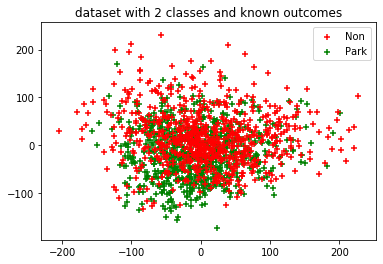

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(svm_x_train)
pca_2d = pca.transform(svm_x_train)

import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if svm_y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='+')
    elif svm_y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    marker='+')
    
pl.legend([c1, c2], ['Non', 'Park'])
pl.title('dataset with 2 classes and known outcomes')
pl.show()

In [34]:
print(len(svm_x_train[0]))

118720


In [26]:
pca_2d.shape[0]

1475

In [36]:
pca_2d[0]


array([ 28.232468, -83.51162 ], dtype=float32)